In [1]:
import sys
sys.path.append("../code/pkg/")
import logging
import numpy as np
import pandas as pd

from data import data
from feature_extraction import feature_extraction
from social_agent import social_agent

//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from scipy import interp

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


from operator import itemgetter

from tabulate import tabulate




from data import data
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: file[%(name)s] line number[%(lineno)d]: %(message)s')
my_data=data(log=logging)
fe = feature_extraction(log=logging)
sa = social_agent(log=logging)

INFO: file[root] line number[35]: Init Data
INFO: file[root] line number[37]: feature extraction new instance
INFO: file[root] line number[76]: social agent new instance
INFO: file[root] line number[35]: Init Data


Get anger and sorrow data sets

In [4]:
desire_xdf, desire_y = my_data.get_subset_w_y(affect='desire', mutuallyExclusive=False)
disgust_xdf, disgust_y = my_data.get_subset_w_y(affect='disgust', mutuallyExclusive=False)
#anger_xdf, anger_y = my_data.get_subset_w_y(affect='anger', mutuallyExclusive=False)
#sorrow_xdf, sorrow_y = my_data.get_subset_w_y(affect='sorrow', mutuallyExclusive=False)

In [5]:
desire_x = []
for datagrams in desire_xdf:
    if isinstance(datagrams, pd.Series):
        continue
    desire_x.append(sa.generate_vector(l1=fe.extend_1(df=datagrams),
                                     l3=fe.extend_3(df=datagrams),
                                     l5=fe.extend_5(df=datagrams),
                                     l6=fe.extend_6(df=datagrams),
                                     l8=fe.extend_8(df=datagrams),
                                     l9=fe.extend_9(df=datagrams),
                                     l11=fe.high_strenght_11(df=datagrams),
                                     l12=fe.low_strenght_12(df=datagrams),
                                     l18=fe.extend_18(df=datagrams)))
    
disgust_x = []
for datagrams in disgust_xdf:
    if isinstance(datagrams, pd.Series):
        continue
    disgust_x.append(sa.generate_vector(l1=fe.extend_1(df=datagrams),
                                     l3=fe.extend_3(df=datagrams),
                                     l5=fe.extend_5(df=datagrams),
                                     l6=fe.extend_6(df=datagrams),
                                     l8=fe.extend_8(df=datagrams),
                                     l9=fe.extend_9(df=datagrams),
                                     l11=fe.high_strenght_11(df=datagrams),
                                     l12=fe.low_strenght_12(df=datagrams),
                                     l18=fe.extend_18(df=datagrams)))


Generate Y as a vector of 2 labels, only the once we are interested
[anger, sorrow] 

In [6]:
a_y=len(desire_y)
s_y=len(disgust_y)

In [7]:
y=np.asarray([[1,0]]*a_y + [[0,1]]*s_y)

In [8]:
X=np.asarray(desire_x+disgust_x)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                            random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(3)
'''
classifier = RandomForestClassifier(class_weight = 'balanced',
                                         n_estimators=100,
                                         max_depth=46,
                                         min_samples_leaf=32,
                                         max_features='auto',
                                         min_samples_split=4,
                                         criterion='gini',
                                         oob_score=True,
                                         verbose=1
                                        )
'''

"\nclassifier = RandomForestClassifier(class_weight = 'balanced',\n                                         n_estimators=100,\n                                         max_depth=46,\n                                         min_samples_leaf=32,\n                                         max_features='auto',\n                                         min_samples_split=4,\n                                         criterion='gini',\n                                         oob_score=True,\n                                         verbose=1\n                                        )\n"

In [12]:
X_train.shape, X_test.shape

((256, 9), (64, 9))

In [17]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
y_score = classifier.predict(X_test)

In [19]:
n_classes=y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    print(i)
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

label_1=['desire','disgust']

0
1


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.72727273 0.76190476 0.66666667]


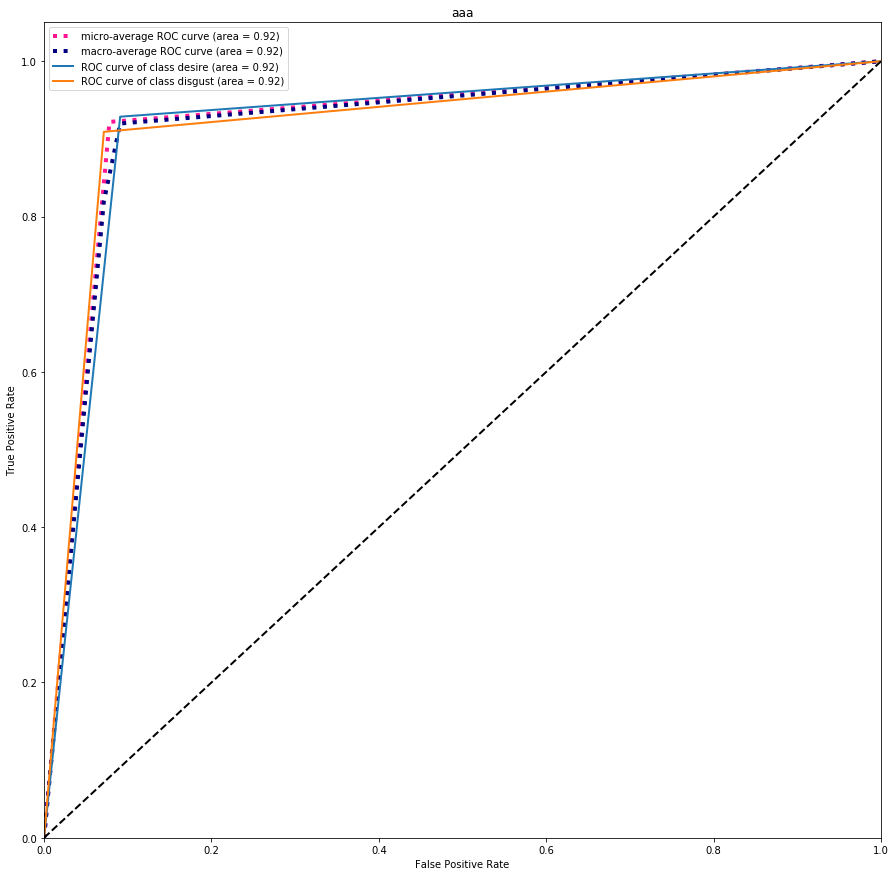

In [21]:
        print(cross_val_score(classifier,X_test,y_test, scoring= 'accuracy'))
        
        lw=2
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(15,15))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(n_classes), colors):
             plt.plot(fpr[i], tpr[i], lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(label_1[i], roc_auc[i]))


        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('aaa')
        plt.legend(loc="best")
        plt.show()


In [38]:
good=0
for x,y in zip(X_test, y_test):
    x=np.array(x)
    x=x.reshape(1,-1)
    r=classifier.predict(x)
    r=r.tolist()[0]
    if r[0] == y[0]:
        good=good+1
        print(list(classifier.predict_proba(x)), y)

[array([[0.66666667, 0.33333333]]), array([[0.33333333, 0.66666667]])] [0 1]
[array([[1., 0.]]), array([[0., 1.]])] [0 1]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[0.33333333, 0.66666667]]), array([[0.66666667, 0.33333333]])] [1 0]
[array([[1., 0.]]), array([[0., 1.]])] [0 1]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[0.66666667, 0.33333333]]), array([[0.33333333, 0.66666667]])] [0 1]
[array([[1., 0.]]), array([[0., 1.]])] [0 1]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[1., 0.]]), array([[0., 1.]])] [0 1]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[array([[1., 0.]]), array([[0., 1.]])] [0 1]
[array([[0., 1.]]), array([[1., 0.]])] [1 0]
[arr

In [26]:
good/len(X_test)

0.921875

In [46]:
myx=np.asarray(list(X_test[1]))
myy=np.asarray(list(y_test[1]))
myx=myx.reshape(1,-1)

In [50]:
for a in X_test:
    x=np.asarray(a)
    x=x.reshape(1,-1)
    print(classifier.predict_proba(x)[1])

[[0.33333333 0.66666667]]
[[0. 1.]]
[[1. 0.]]
[[0.66666667 0.33333333]]
[[0. 1.]]
[[1. 0.]]
[[0.33333333 0.66666667]]
[[0. 1.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[0.66666667 0.33333333]]
[[0.66666667 0.33333333]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]
[[1. 0.]]
[[1. 0.]]
[[0.33333333 0.66666667]]
[[1. 0.]]
[[0. 1.]]
[[0. 1.]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]
[[0. 1.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[0.33333333 0.66666667]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[0.33333333 0.66666667]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]
[[0.66666667 0.33333333]]
[[1. 0.]]
[[0. 1.]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]
[[0. 1.]]
[[0.33333333 0.66666667]]
[[1. 0.]]
[[1. 0.]]
[[0.33333333 0.66666667]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]
[[0.33333333 0.66666667]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[0. 1.]]


In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
x1=np.asarray(X_test[0])
x1=x1.reshape(1,-1)
x2=np.asarray(X_test[1])
x1=x1.reshape(1,-1)
print(cosine_similarity(x1, x2))

ValueError: Expected 2D array, got 1D array instead:
array=[ 32.90153654   0.           0.         -17.84818643   0.81666667
   0.8          0.5          0.31666667  32.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.